In [1]:
import sys
sys.path.append('../')
from src.utils.utils import get_sp500
from src.utils.utils import SP500ReturnSimulator

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [24, 16]

SIMULATION_SIZE=50

# Get the data

Due to the limitation of the API, we are only able to retrieve the S&P500 index for the past 10 years.

In [2]:
sp500 = get_sp500(dropna=True)

In [3]:
sp500

DATE
2011-01-06    1273.85
2011-01-07    1271.50
2011-01-10    1269.75
2011-01-11    1274.48
2011-01-12    1285.96
               ...   
2020-12-29    3727.04
2020-12-30    3732.04
2020-12-31    3756.07
2021-01-04    3700.65
2021-01-05    3726.86
Name: sp500, Length: 2516, dtype: float64

<AxesSubplot:xlabel='DATE', ylabel='sp500'>

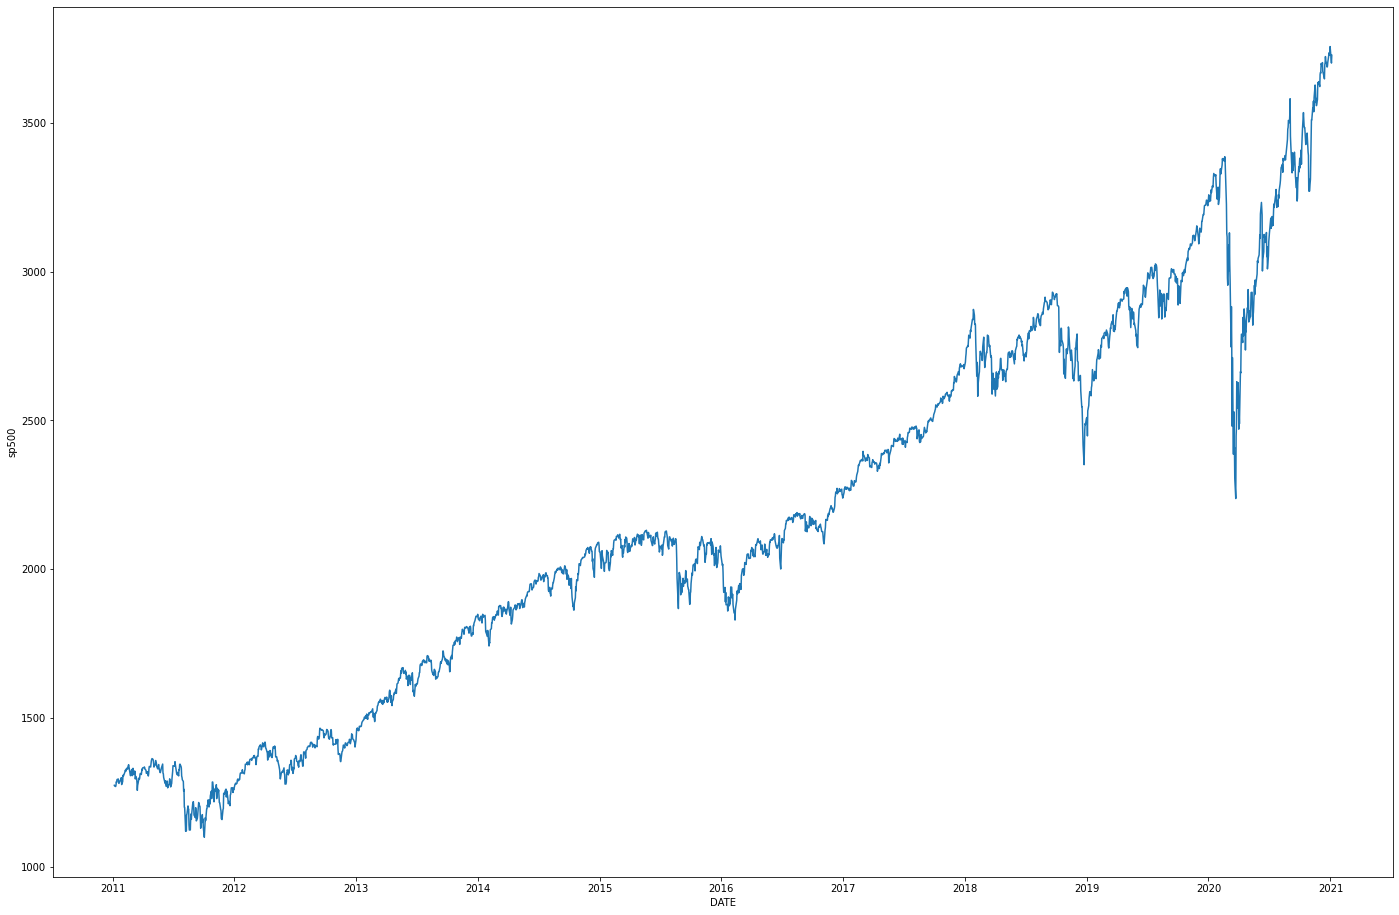

In [4]:
sns.lineplot(x='DATE', y='sp500', data=sp500.reset_index())

# Simulate return

We are assuming a buy only strategy on the S&P 500 and sell at the end of the time series (say retirement).


## Monthly buyer

The SP500ReturnSimulator has a few method to simulate the annualised return given various buying strategy given a buying frequency. Let's start by assuming that we only buy once a year so the number of purchase over the 10 years would be 10 * 12 or 120 times.

In [5]:
monthly_simulator = SP500ReturnSimulator(series=sp500, number_of_purchase=120)

### Best Case

The following graph shows the best 120 purchases over time. It is not the best 120 points to buy the stock as that would equate to buying all at the start of the time series. Rather, we split the time series into 120 chunks and find the best buying time in each of the period which resembles a consistent buying strategy.

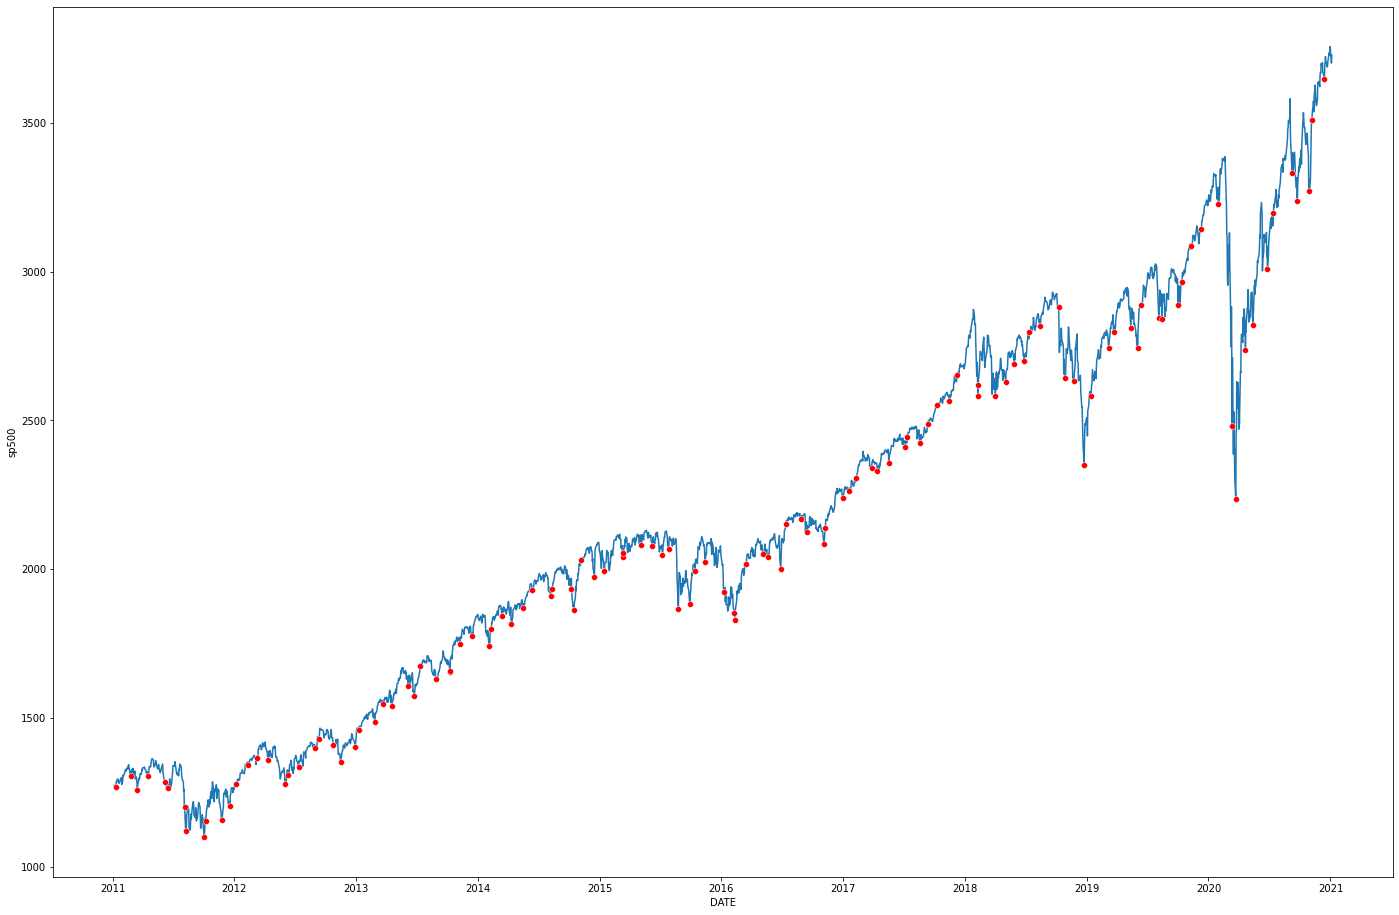

0.1759941800081684

In [6]:
monthly_simulator.optimal_return(plot=True)

### Worst case

On the other hand, the following is the reverse of the above which provide the return if all our buying timing were all at the worst time (highest point of the period).

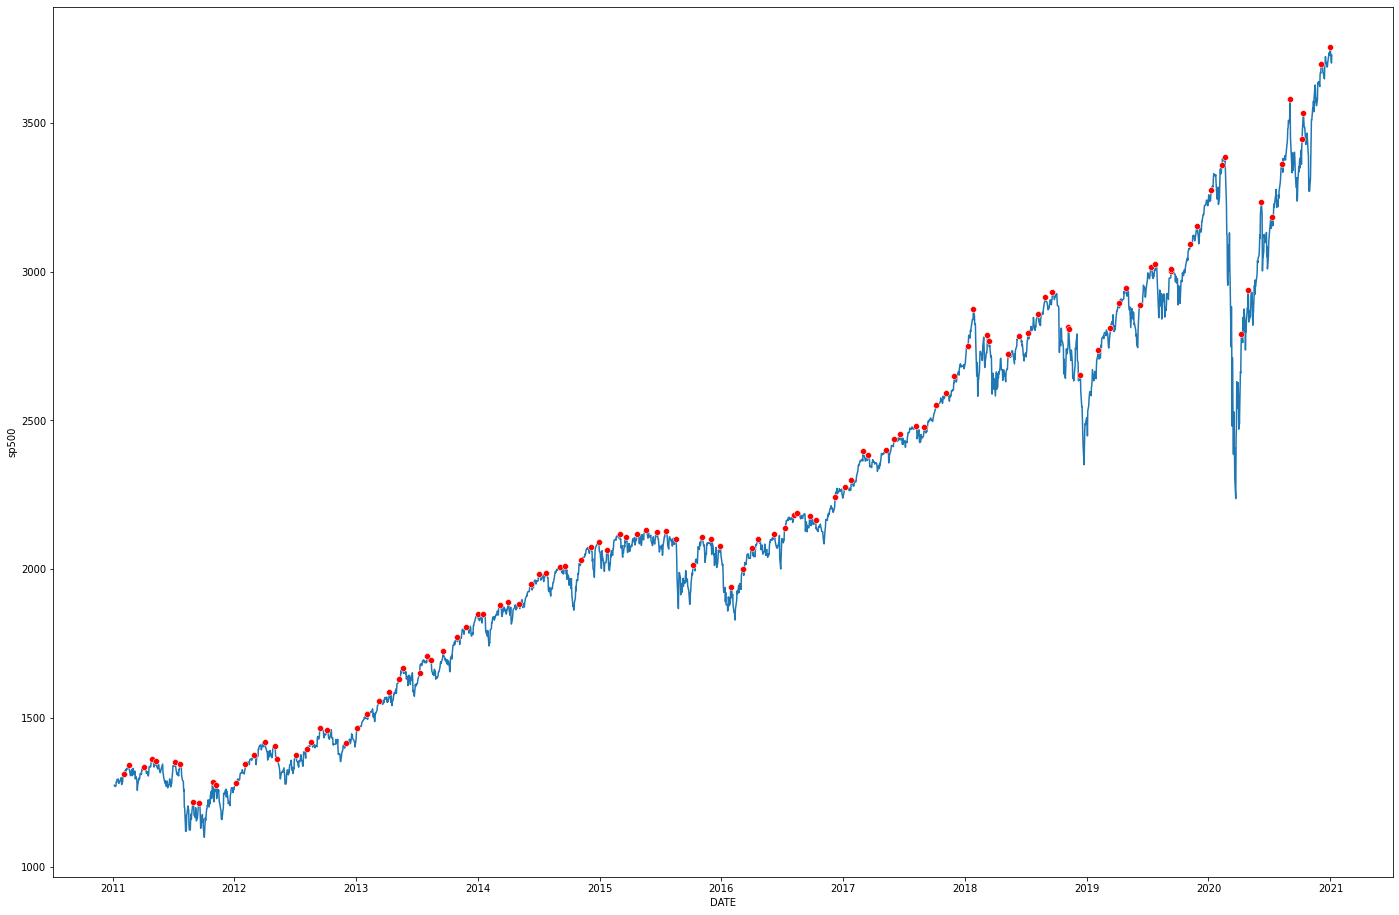

0.13161951073114886

In [7]:
monthly_simulator.worst_return(plot=True)

### Consistent Purchase

The consistent purchase is if we always buy say the first day of the period. Since this is not deterministic, we simulate 50 scenarios and then take the average.

In [8]:
monthly_simulator.random_sampling_strategy(plot=False, sample=SIMULATION_SIZE)

0.15533449652000425

### Random Purchase

In this case, we random pick a date within the period and makge a purchase, we also run 50 simulations.

In [9]:
monthly_simulator.equal_space_strategy(plot=False, sample=SIMULATION_SIZE)

0.15338862930123848

The simulation shows that there are no difference in the expected return between consistent or random purchase. There is a marginal gap between them and the optimal value, but the size isn't large given the number of correct guesses required.

## Annual Buyer

Let's change the frequency of buying and then see whether the return changes.

In [10]:
annual_simulator = SP500ReturnSimulator(series=sp500, number_of_purchase=10)

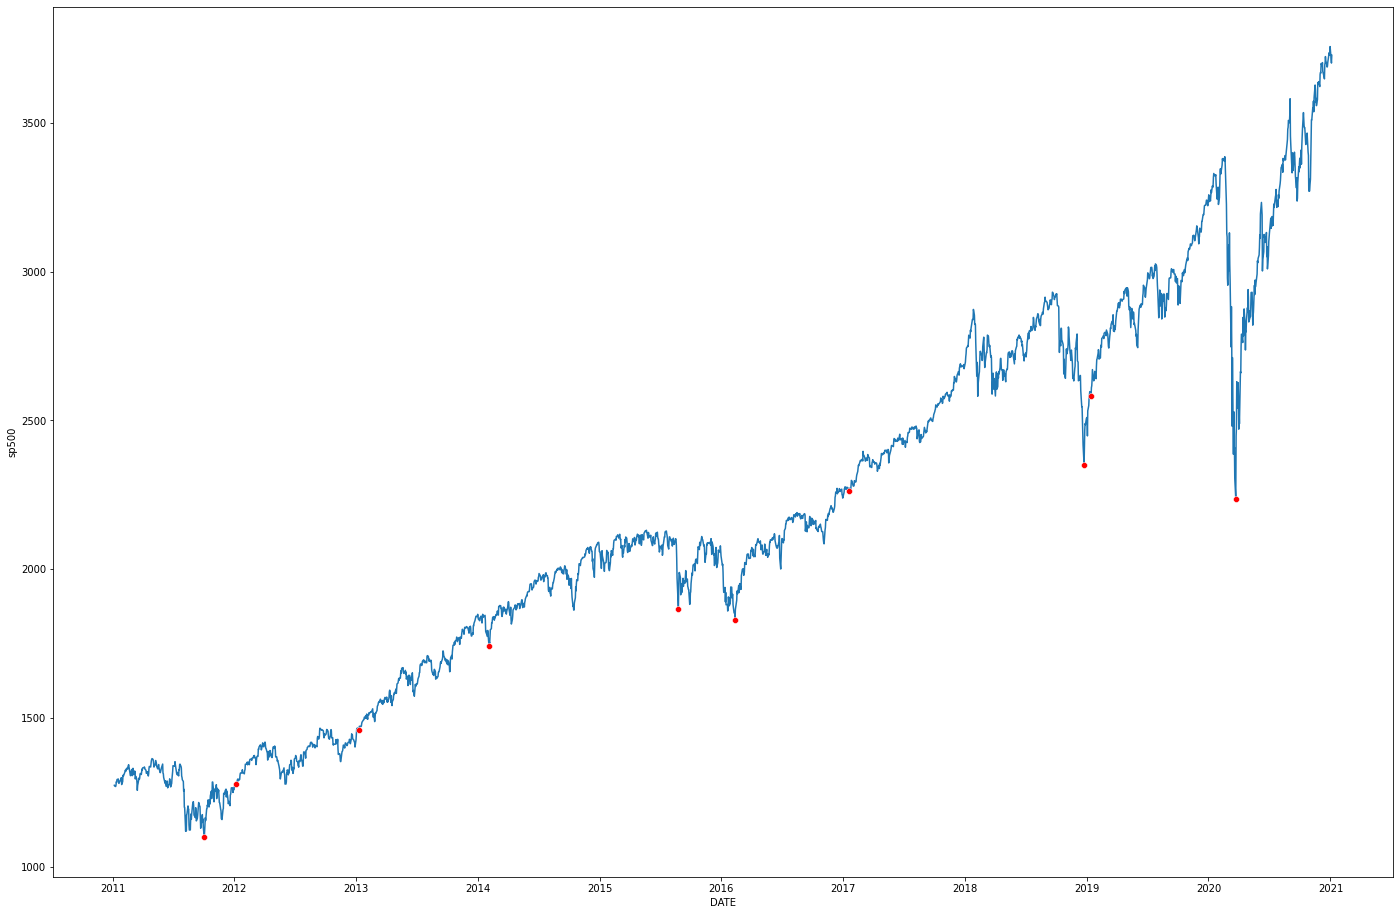

0.22963800532957518

In [11]:
annual_simulator.optimal_return(plot=True)

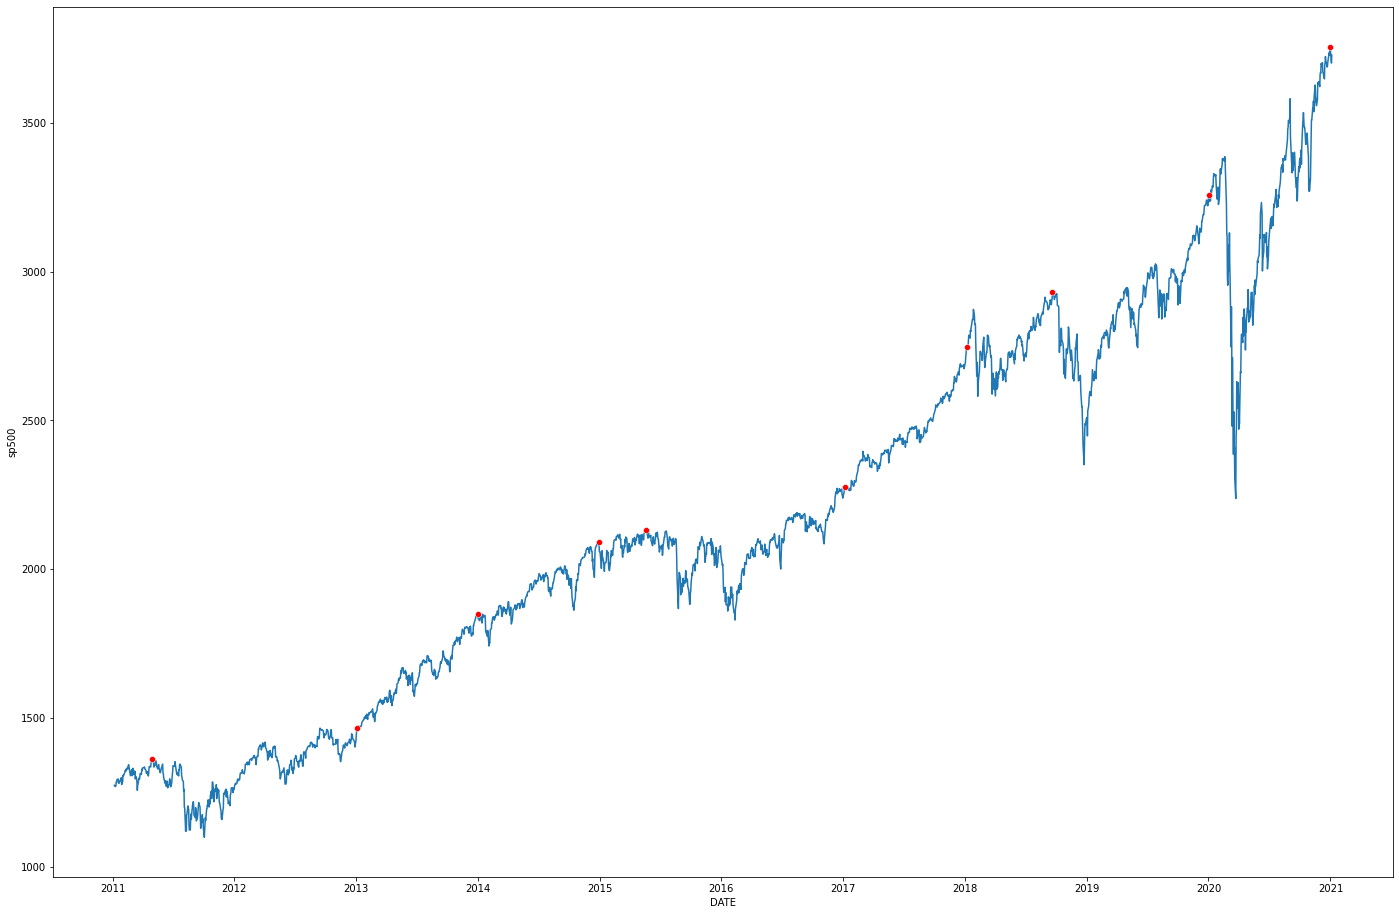

0.06547403022186644

In [12]:
annual_simulator.worst_return(plot=True)

In [13]:
annual_simulator.random_sampling_strategy(plot=False, sample=SIMULATION_SIZE)

0.16209001211225035

In [14]:
annual_simulator.equal_space_strategy(plot=False, sample=SIMULATION_SIZE)

0.15858947047838576

If you only buy once a year, then the timing can be really important. If you are a consistent pace buyer, then the return doesn't change whether you are monthly or annual buyer, the return is similar but the variability should be lower for monthly. However, if you are consistently good or bad, then your return can be as low as 6% or as high as 23%. 

**What this suggests is that if you are patient enough and wait for a crash every N years, then you can get be rewarded handsomly for your patience.**

## Weekly buyer

Finally, let us see what happens if we buy weekly.

In [16]:
weekly_simulator = SP500ReturnSimulator(series=sp500, number_of_purchase=520)

In [17]:
weekly_simulator.optimal_return()

0.17020240740422418

In [18]:
weekly_simulator.worst_return()

0.14761640707881804

In [19]:
weekly_simulator.random_sampling_strategy(plot=False, sample=SIMULATION_SIZE)

0.15732772909539447

In [20]:
weekly_simulator.equal_space_strategy(plot=False, sample=SIMULATION_SIZE)

0.15695693022872934

If we are buying weekly, then there is very little value in trying to buy at the highest point. The gain is marginal and given the frequency of the purchase, the probability of correctly selecting the optimal point to buy for 520 times is astronomically small. The upside is that the worst you can do is also no far off compare to the best case scenario.